# Voorspel of een tumor goedaardig is of kwaadaardig

## Importeren toolset
- De tools die we gebruiken moeten we eerst importeren voordat we ze kunnen gebruiken.

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import mglearn
from preamble import *
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn import tree as tree_plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

## Laden van de borstkanker dataset
- 30 kolommen met kenmerken van de tumor
- 1 kolom waarin staat of de tumor goedaardig is of kwaadaardig (0 = kwaadaardig, 1 = goedaardig). Dit is vastgesteld met een punctie.

In [ ]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
df['IsBenign'] = cancer.target
display(df)
df.to_csv('cancer_data.csv', index = False)
print( {n: v for n, v in zip(['kwaadaardig', 'goedaardig'], np.bincount(cancer.target))})
print('1 in kolom IsBenign betekent dat de tumor goedaardig is')

mean radius  mean texture  mean perimeter  mean area  ...  \
0          17.99         10.38          122.80     1001.0  ...   
1          20.57         17.77          132.90     1326.0  ...   
2          19.69         21.25          130.00     1203.0  ...   
3          11.42         20.38           77.58      386.1  ...   
4          20.29         14.34          135.10     1297.0  ...   
..           ...           ...             ...        ...  ...   
564        21.56         22.39          142.00     1479.0  ...   
565        20.13         28.25          131.20     1261.0  ...   
566        16.60         28.08          108.30      858.1  ...   
567        20.60         29.33          140.10     1265.0  ...   
568         7.76         24.54           47.92      181.0  ...   

     worst concave points  worst symmetry  worst fractal dimension  IsBenign  
0                    0.27            0.46                     0.12         0  
1                    0.19            0.28                     0.09         0  
2                    0.24            0.36                     0.09         0  
3                    0.26            0.66                     0.17         0  
4                    0.16            0.24                     0.08         0  
..                    ...             ...                      ...       ...  
564                  0.22            0.21                     0.07         0  
565                  0.16            0.26                     0.07         0  
566                  0.14            0.22                     0.08         0  
567                  0.27            0.41                     0.12         0  
568                  0.00            0.29                     0.07         1  

[569 rows x 31 columns]

{'kwaadaardig': 212, 'goedaardig': 357}
1 in kolom IsBenign betekent dat de tumor goedaardig is


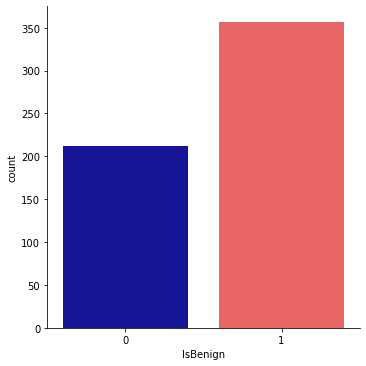

In [ ]:
sns.catplot(kind = 'count', x = 'IsBenign', data=df)

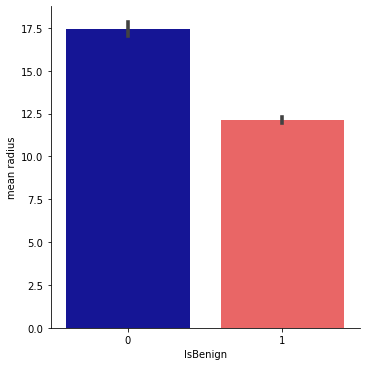

In [ ]:

sns.catplot(kind = 'bar', x = 'IsBenign', y = 'mean radius', data=df)
def chart_by(data,by):
    cols = list(data.columns)
    for col in cols:
        if col != by:
            sns.catplot(kind = 'bar', x = by , y = col , data=data)
            plt.show()

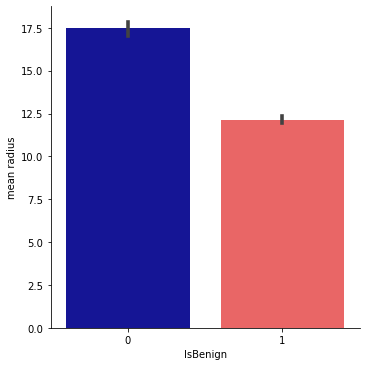

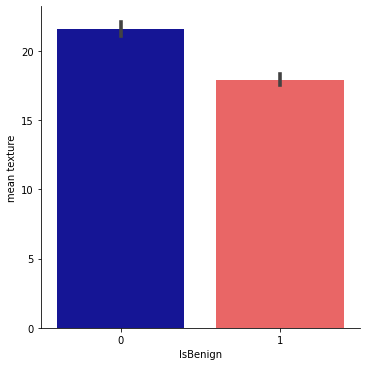

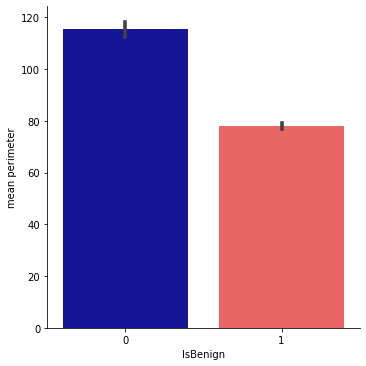

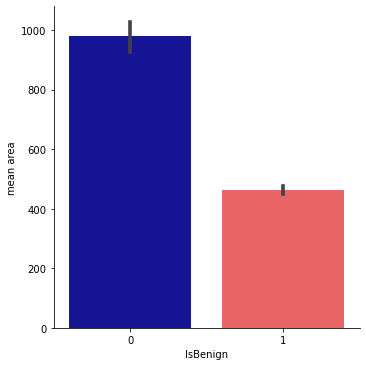

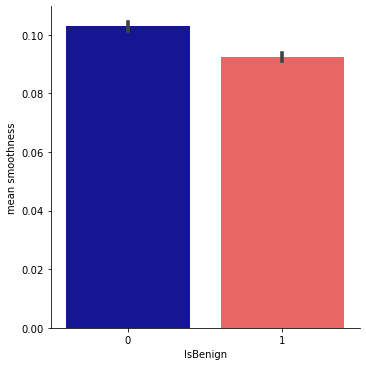

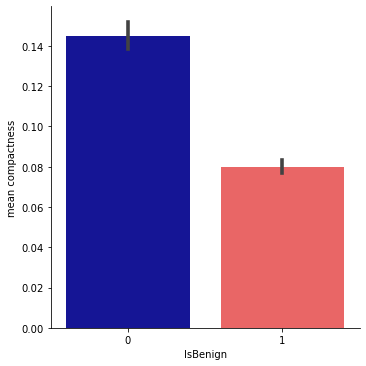

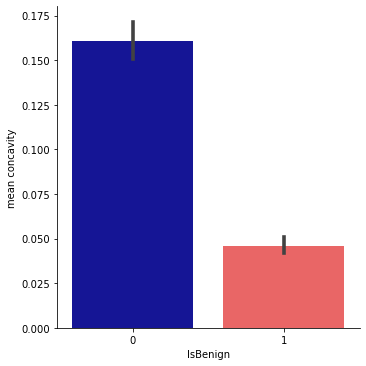

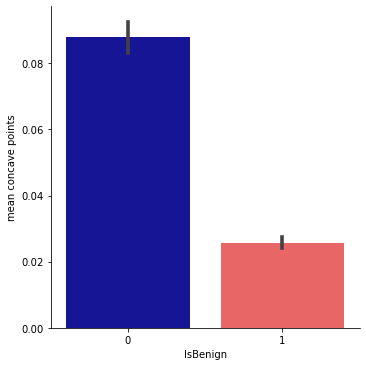

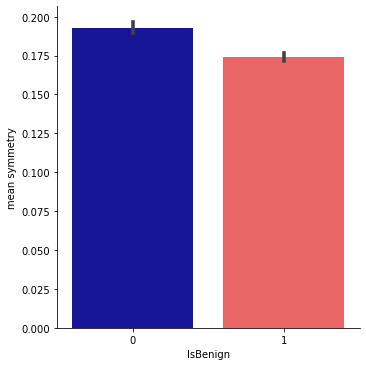

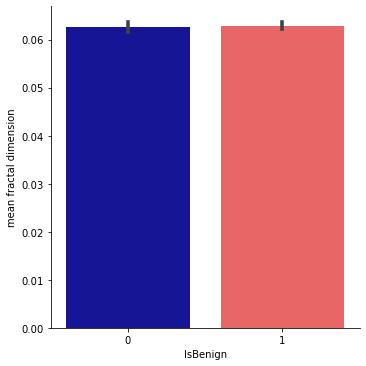

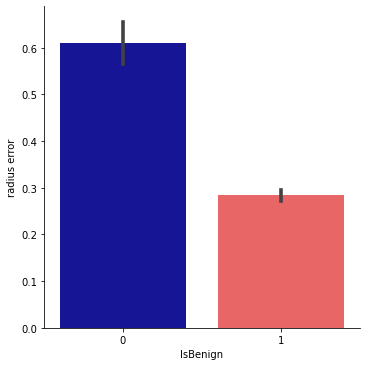

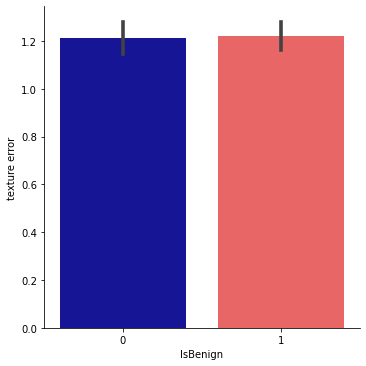

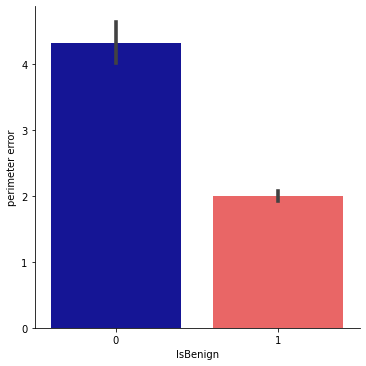

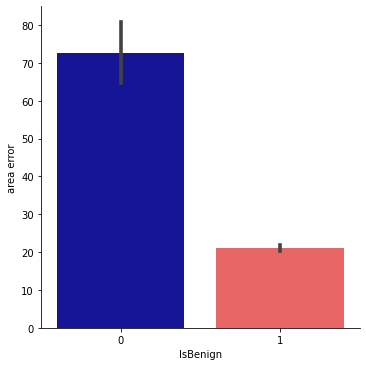

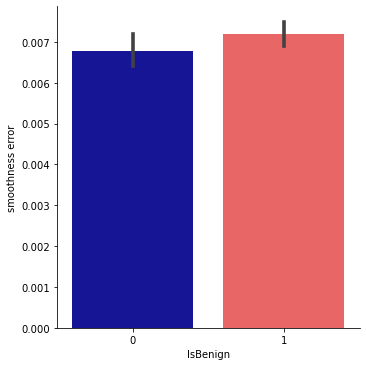

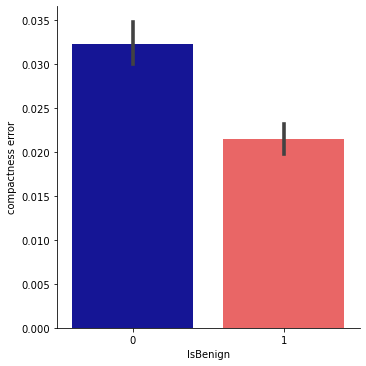

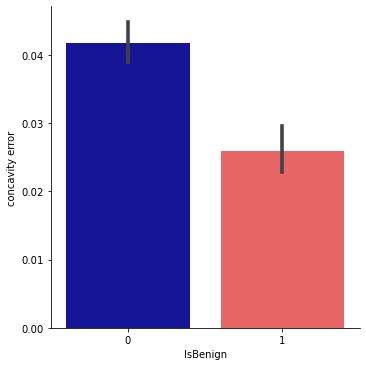

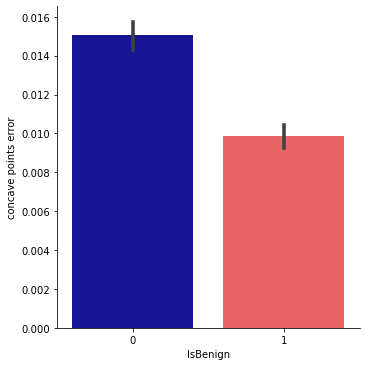

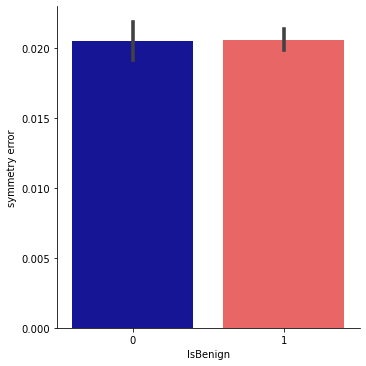

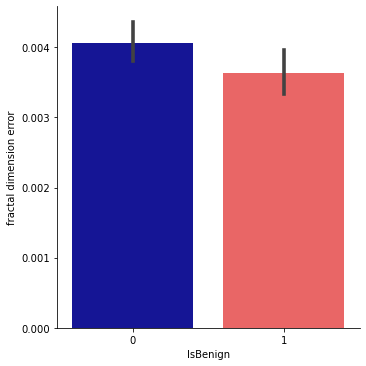

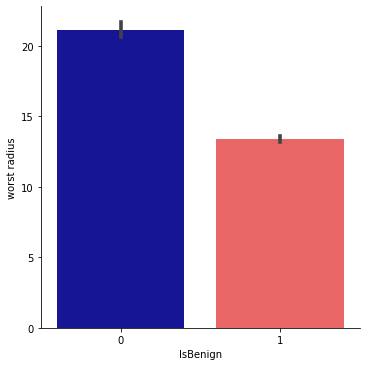

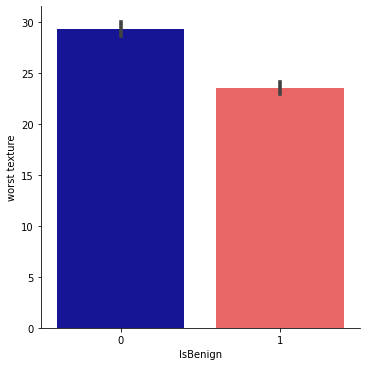

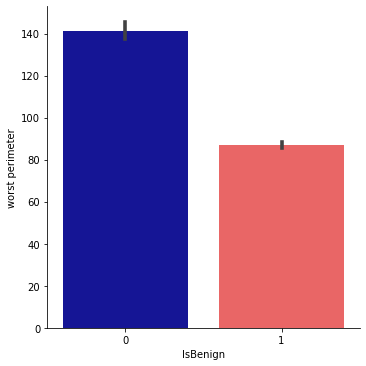

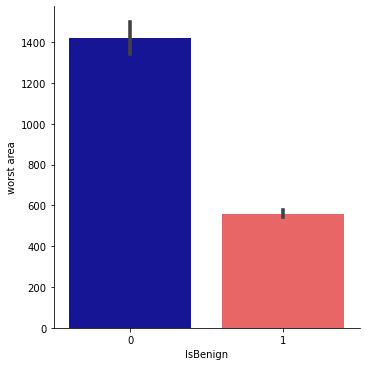

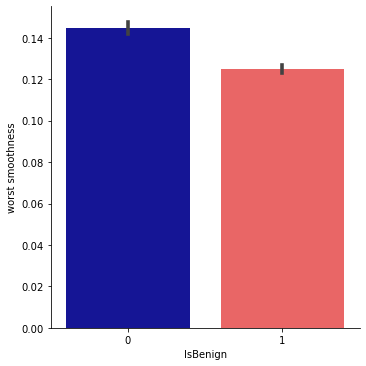

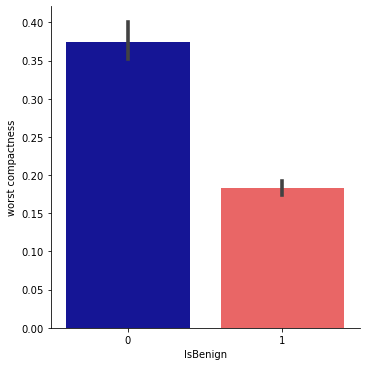

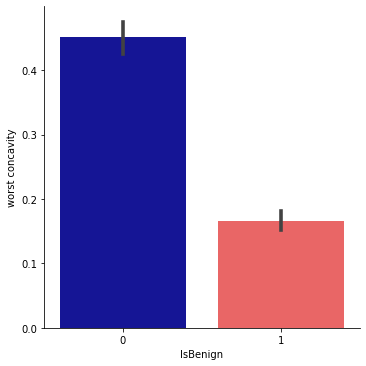

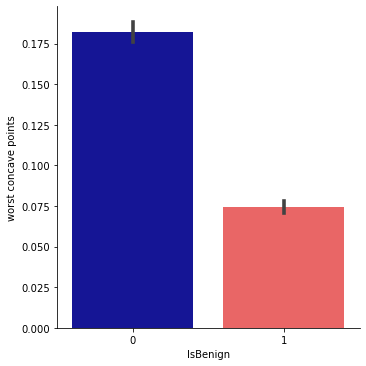

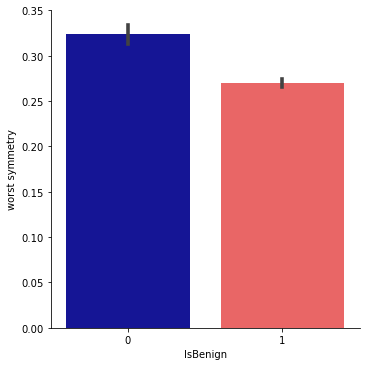

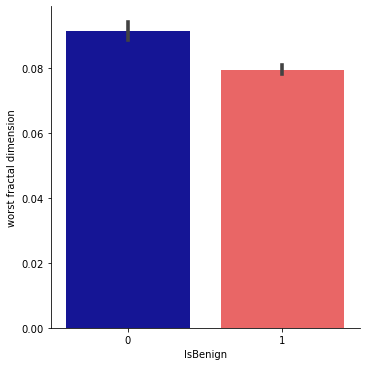

In [ ]:
chart_by(df,'IsBenign')

## Splitsen in x-variabelen en y-variabele

- Met de x-variabelen proberen we de y-variabele zo goed mogelijk te voorspellen.
- X-variabelen: de kenmerken van de tumor (mean radius, mean texture etc.).
- y-variabele: de klasse die we willen voorspellen. In dit geval kwaadaardig of goedaardig, 0 of 1.

In [ ]:
X = df.drop('IsBenign', axis=1)
y = df['IsBenign']

## Splitsen in training data en test data
- De training data gebruiken we om het model te trainen
- De test data gebruiken we om te bepalen hoe goed ons model kan voorspellen

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)
print('X_train:', 'Aantal rijen =' ,X_train.shape[0], ',','Aantal kolommen =', X_train.shape[1], )
print('y_train: ', 'Aantal rijen =', y_train.shape[0], ',','Aantal kolommen =', 1 )
print('X_test:', 'Aantal rijen =' ,X_test.shape[0], ',','Aantal kolommen =', X_test.shape[1], )
print('y_test: ', 'Aantal rijen =', y_test.shape[0], ',','Aantal kolommen =', 1 )

X_train: Aantal rijen = 426 , Aantal kolommen = 30
y_train:  Aantal rijen = 426 , Aantal kolommen = 1
X_test: Aantal rijen = 143 , Aantal kolommen = 30
y_test:  Aantal rijen = 143 , Aantal kolommen = 1


## Trainen van het model
- In dit geval maken we een beslisboom (decision tree)

In [ ]:
tree = DecisionTreeClassifier(random_state = 42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

## Visualisatie van het model
- Voor de eerste "split" wordt "mean concave points" gebruikt. Alle rijen (patienten) die een "mean concave points" hebben die lager is dan 0.051 worden toegekend aan de klasse goedaardig (benign). Dit is het blok linksonder het bovenste blok. Voorafgaand aan deze split hadden we 426 "samples" oftewel rontgenfoto's. Van deze foto's waren er 158 daadwerkelijk kwaadaardig en 268 goedaardig. De gini score geeft aan hoe "waardevol" de splitsing is. Hoe hoger, hoe beter.
- Het resultaat is dat er 267 foto's (samples) naar het linker blok gaan en 159 naar het rechter blok. 
- Het rechterblok wordt vervolgens gesplits op "worst texture".
- De beslisboom gaat net zolang door met splitsen totdat in de de onderste rij blokken alles goed is voorspeld

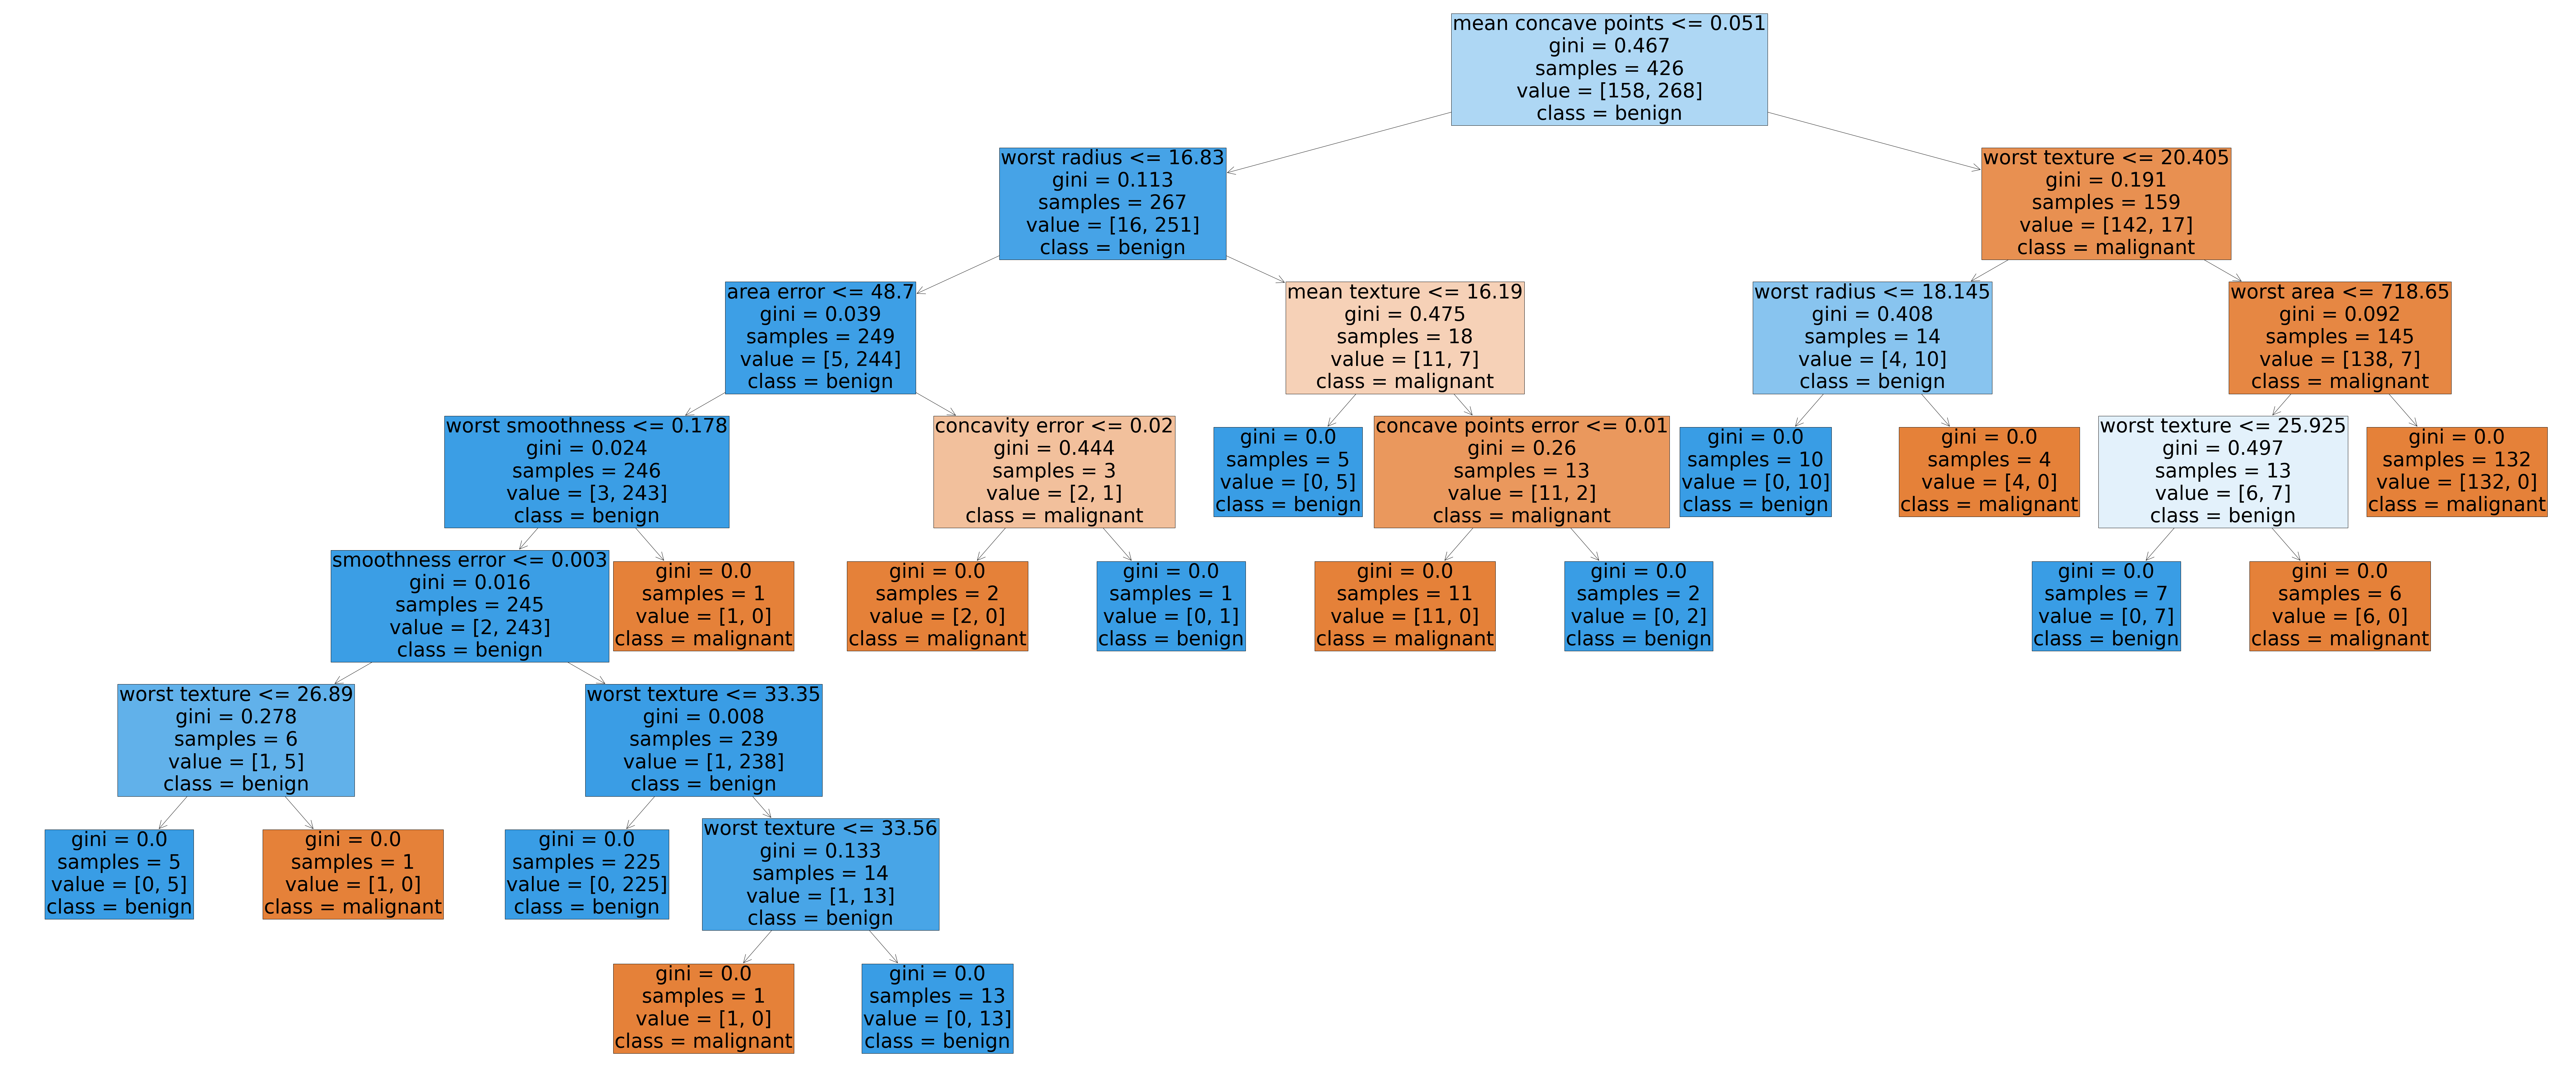

In [ ]:
fig = plt.figure(figsize=(140,60))
_ = tree_plt.plot_tree(tree, 
                   feature_names=cancer.feature_names,  
                   class_names=cancer.target_names,
                   filled=True, impurity = 'true', fontsize = 60)

## Voorspellen met de getrainde beslisboom
- We gebruiken de test data om te bepalen hoe goed ons model is

In [ ]:
predictions = tree.predict(X_test)
display('Onze voorspellingen:', predictions[:])
display('De werkelijkheid:', np.array(y_test))
print("Percentage juist voorspeld: {:.2f} ".format( tree.score(X_test, y_test)*100))

'Onze voorspellingen:'

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1])

'De werkelijkheid:'

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1])

Percentage juist voorspeld: 95.10 


## Analyseren van de voorspellingen
- Hieruit blijkt dat het model 51 van de 54 kwaadaardige tumoren heeft gevonden.
- Het model heeft 55 keer voorspeld dat de tumor kwaadaardig is. In 51 van deze gevallen was de voorspelling juist.

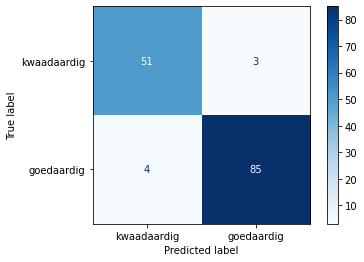

In [ ]:
plot_confusion_matrix(tree, X_test, y_test,display_labels=['kwaadaardig', 'goedaardig'], cmap=plt.cm.Blues, normalize=None)
plt.show()

## Welke kenmerken zijn het belangrijkst om te bepalen of een tumor goed- of kwaadaardig is?
- Hieruit blijkt dat "mean concave points" het belangrijkste tumorkenmerk is om te bepalen of een tumor goed- of kwaadaardig is. Dit bleek overigens ook al uit het feit dat de eerste split van de beslisboom een split op deze variable was met een hoge gini-score.

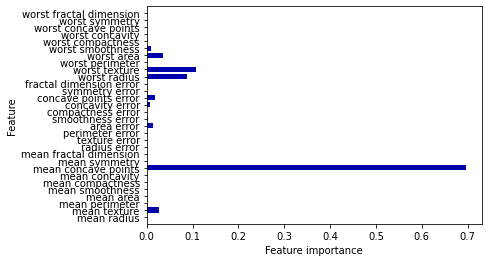

In [ ]:
plot_feature_importances_cancer(tree)